$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [ ]:
#check whether you can pass arbitrary arguments to evalf 
# my_x = np.array([1,3,4]) #Note: my_x is a list of 2 elements, but not a numpy array
# print('f(my_x) is:',evalf(my_x))

AssertionError: ignored

In [ ]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [ ]:
#now call evalf (x) with my_x as argument and check if it works
print(evalf(my_x))

10730


In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [ ]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals


In [ ]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)
print('Minimum value:',fvals_ret[-1])

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

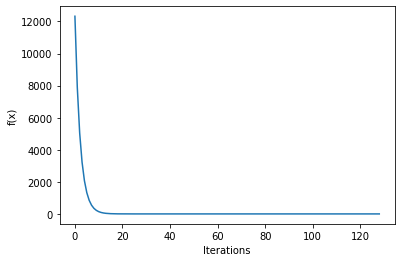

In [30]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

## Answer 2:
Minimizer of $f(x) = [-99.99958844, 24.99994388]$ \
Minimum Value of $f(x) = 1.7253033717248775e-07 ≈ 0$

## Answer 3:

For p = 1
Minimizer =[-99.9553787   24.99391528] , Minimum value = 0.0020280843668995063 , No of iterations = 36
For p = 2
Minimizer =[-99.99520882  24.99934666] , Minimum value = 2.3382220797474075e-05 , No of iterations = 46
For p = 3
Minimizer =[-99.99958844  24.99994388] , Minimum value = 1.7253033717248775e-07 , No of iterations = 57
For p = 4
Minimizer =[-99.99995581  24.99999397] , Minimum value = 1.989139359193299e-09 , No of iterations = 67
For p = 5
Minimizer =[-99.99999526  24.99999935] , Minimum value = 2.293321544605827e-11 , No of iterations = 77
For p = 6
Minimizer =[-99.99999959  24.99999994] , Minimum value = 1.6921726745458407e-13 , No of iterations = 88
For p = 7
Minimizer =[-99.99999996  24.99999999] , Minimum value = 1.950942200128245e-15 , No of iterations = 98
For p = 8
Minimizer =[-100.   25.] , Minimum value = 2.249273021138356e-17 , No of iterations = 108
For p = 9
Minimizer =[-100.   25.] , Minimum value = 1.6597088735501767e-19 , No of iterations = 119
For p

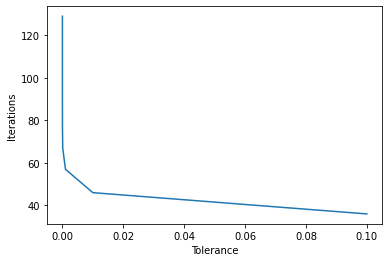

In [33]:
iters = []
tol = []
for p in range(1,11):
  my_start_x = np.array([10,10])
  my_steplength = 0.1
  my_tol= 10**-p 
  tol.append(my_tol)
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  print('For p = {}'.format(p))
  print('Minimizer ={} , Minimum value = {} , No of iterations = {}'.format(opt_x,fvals_ret[-1],len(fvals_ret)))
  iters.append(len(fvals_ret))
plt.plot(tol,iters)
plt.xlabel('Tolerance')
plt.ylabel('Iterations')
plt.show()

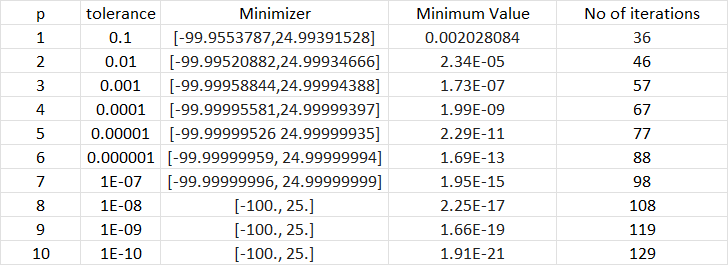

From the graph above, we can observe that as the tolerance value decreases, the number of iterations required increases since we are moving towards a smaller value of gradient and hence smaller value of the function f. Also when we have decreased the tolerance we observe that after a certain limit, the minimizer has approached to the actual minima of the function i.e. [-100,25] and the function value has also decreased continuously and approaching to zero.

## Answer 4:

For step length = 0.0001
Minimizer =[-99.99999505  24.99999932] , Minimum value = 2.49936770204995e-11 , No of iterations = 84572
For step length = 0.001
Minimizer =[-99.99999505  24.99999933] , Minimum value = 2.494219709847674e-11 , No of iterations = 8451
For step length = 0.01
Minimizer =[-99.99999512  24.99999933] , Minimum value = 2.4304673044883465e-11 , No of iterations = 839
For step length = 0.1
Minimizer =[-99.99999526  24.99999935] , Minimum value = 2.293321544605827e-11 , No of iterations = 77
For step length = 0.2
Minimizer =[-99.99999685  24.99999957] , Minimum value = 1.011747066175869e-11 , No of iterations = 35
For step length = 0.4
Minimizer =[-99.99999775  24.99999969] , Minimum value = 5.169479687800271e-12 , No of iterations = 12
For step length = 0.5
Minimizer =[-100.   25.] , Minimum value = 0.0 , No of iterations = 2
For step length = 0.6
Minimizer =[-100.00000225   25.00000031] , Minimum value = 5.169479687800271e-12 , No of iterations = 12
For step length = 0

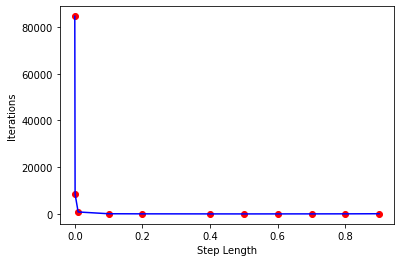

In [38]:
iters = []
step_lengths = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for s in step_lengths:
  my_start_x = np.array([10,10])
  my_steplength = s
  my_tol= 10**-5 
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  print('For step length = {}'.format(s))
  print('Minimizer ={} , Minimum value = {} , No of iterations = {}'.format(opt_x,fvals_ret[-1],len(fvals_ret)))
  iters.append(len(fvals_ret))
plt.plot(step_lengths,iters,'b-')
plt.scatter(step_lengths,iters,color='r')
plt.xlabel('Step Length')
plt.ylabel('Iterations')
plt.show()

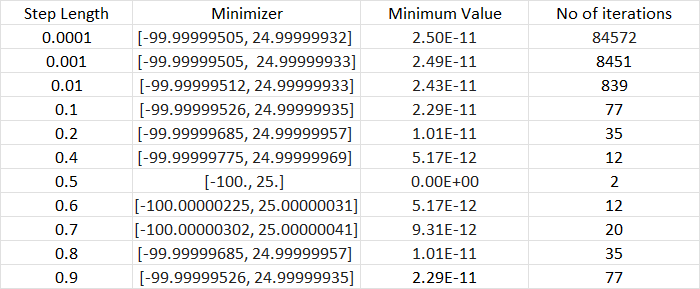

We observe that the number of iterations required for step value of 0.0001 is very large than that required for step value of 0.001. We see that the drop is very drastic when we scale the step size by a factor of 10 and then the decrease is a bit flat. Also for step value 0.5, the function attains its actual minimum value 0 and the minimizers also attain their actual values. At this value gradient descent converges the fastest i.e. in 2 iterations. After that the value of function value starts increasing and gradient starts to diverge as because of the large step size, we cross the minima to reach the other side of the hole.

In [43]:
iters = []
start_values = [[10000, 10000], [500, 0], [0, 1000], [1, 1], [-500, -2]]
for x in start_values:
  my_start_x = np.array(x)
  my_steplength = 0.1
  my_tol= 10**-5 
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  print('For starting value = {}'.format(x))
  print('Minimizer ={} , Minimum value = {} , No of iterations = {}'.format(opt_x,fvals_ret[-1],len(fvals_ret)))
  iters.append(len(fvals_ret))
# plt.plot(step_lengths,iters,'b-')
# plt.scatter(step_lengths,iters,color='r')
# plt.xlabel('Step Length')
# plt.ylabel('Iterations')
# plt.show()

For starting value = [10000, 10000]
Minimizer =[-99.99999679  25.00000317] , Minimum value = 2.0414342669998657e-11 , No of iterations = 99
For starting value = [500, 0]
Minimizer =[-99.99999566  24.99999982] , Minimum value = 1.888746375147865e-11 , No of iterations = 85
For starting value = [0, 1000]
Minimizer =[-99.99999954  25.00000452] , Minimum value = 2.060780080476227e-11 , No of iterations = 87
For starting value = [1, 1]
Minimizer =[-99.99999564  24.99999896] , Minimum value = 2.0052840841640608e-11 , No of iterations = 77
For starting value = [-500, -2]
Minimizer =[-100.00000452   24.99999969] , Minimum value = 2.055190630073527e-11 , No of iterations = 83


## Answer 5:

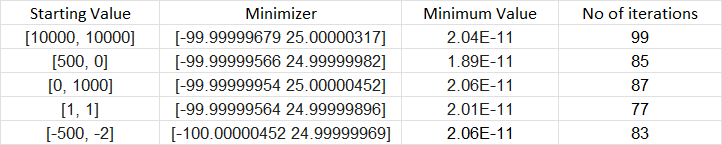

We can observe that the difference in number of iterations required for gradient descent to converge is not that significant for these 5 starting points even though they are very far from each other. From this we can imply that the slope is even around the minimizer. Also we can see that the starting points are very far off from the minimizer value, still they converge in 
less than 100 iterations, which imply that the slope of the function is large. 